<a href="https://colab.research.google.com/github/AnaHelena97/MachineLearningByExamplePython/blob/master/3_Wine_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from sklearn import datasets
import matplotlib.pyplot as plt
import math

In [0]:
wine = datasets.load_wine()

In [18]:
print(wine.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

## Initial data analysis:

3 classes;

13 features;

59 samples (class 1) + 71 samples (class 2) + 48 samples (class 3) = 178


In [19]:
wine.target_names

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

In [20]:
wine.feature_names


['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [21]:
wine.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [22]:
wine.data[0:3]
# cols are features
# rows are samples

array([[1.423e+01, 1.710e+00, 2.430e+00, 1.560e+01, 1.270e+02, 2.800e+00,
        3.060e+00, 2.800e-01, 2.290e+00, 5.640e+00, 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, 1.120e+01, 1.000e+02, 2.650e+00,
        2.760e+00, 2.600e-01, 1.280e+00, 4.380e+00, 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, 1.860e+01, 1.010e+02, 2.800e+00,
        3.240e+00, 3.000e-01, 2.810e+00, 5.680e+00, 1.030e+00, 3.170e+00,
        1.185e+03]])

Plot 2 features at the time:

In [23]:
help(plt.scatter)

Help on function scatter in module matplotlib.pyplot:

scatter(x, y, s=None, c=None, marker=None, cmap=None, norm=None, vmin=None, vmax=None, alpha=None, linewidths=None, verts=<deprecated parameter>, edgecolors=None, *, plotnonfinite=False, data=None, **kwargs)
    A scatter plot of *y* vs. *x* with varying marker size and/or color.
    
    Parameters
    ----------
    x, y : scalar or array-like, shape (n, )
        The data positions.
    
    s : scalar or array-like, shape (n, ), optional
        The marker size in points**2.
        Default is ``rcParams['lines.markersize'] ** 2``.
    
    c : color, sequence, or sequence of colors, optional
        The marker color. Possible values:
    
        - A single color format string.
        - A sequence of colors of length n.
        - A scalar or sequence of n numbers to be mapped to colors using
          *cmap* and *norm*.
        - A 2-D array in which the rows are RGB or RGBA.
    
        Note that *c* should not be a single 

Text(0.5, 1.0, 'Wine distribution')

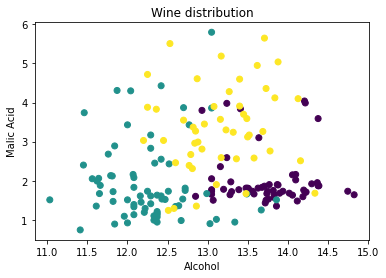

In [24]:
# Select all rows and only first two columns (alcohol/malic acid)
X = wine.data[:, :2]

# Target will be used to plot samples in different colors for different types of wines
Y = wine.target # class 1, 2 and 3

plt.scatter(X[:,0], X[:,1], c=Y)
plt.xlabel('Alcohol')
plt.ylabel('Malic Acid')
plt.title('Wine distribution')

Maybe plotting alcohol with all the other features will show some clustering?

In [0]:
help(plt.subplots)

In [0]:
wine.target

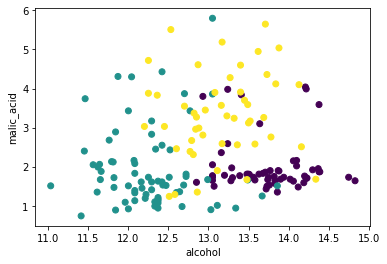

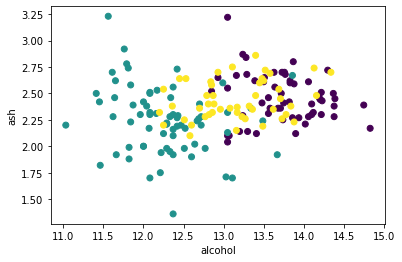

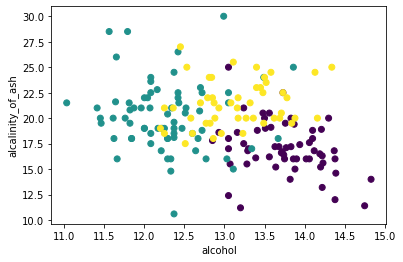

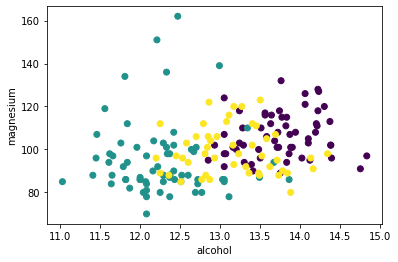

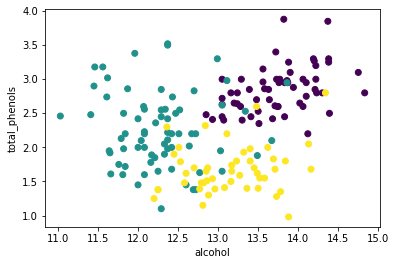

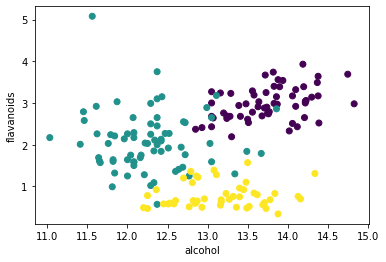

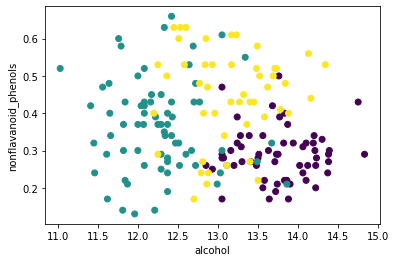

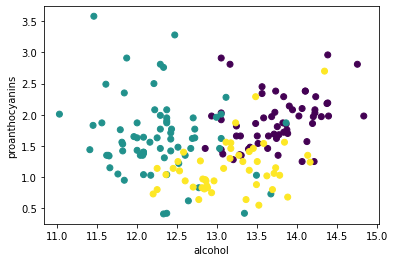

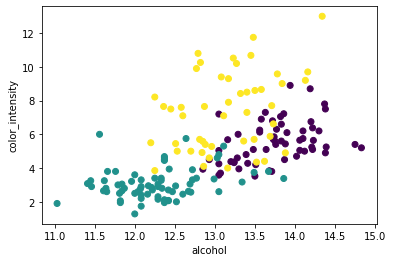

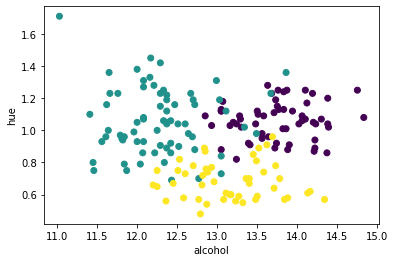

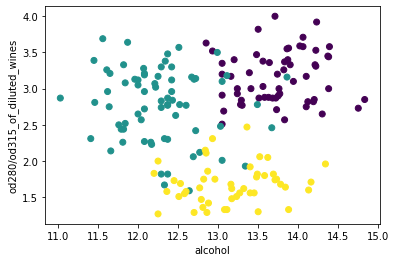

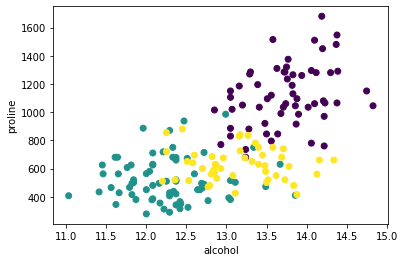

In [55]:
# Select all rows and only first columns and all the others one at a time (alcohol/features)

for f in range(1, wine.data.shape[1]): 
  X = wine.data[:, 0] # alcohol
  Y = wine.data[:, f] # one feature at a time

  f_name = wine.feature_names[f]
  # Target will be used to plot samples in different colors for different types of wines
  Z = wine.target # class 1, 2 and 3
  
  plt.figure()
  plt.scatter(X, Y, c=Z)
  # plt.scatter(X, Y, c=Z, label=wine.target_names) # does NOT work
  #plt.legend()
  #plt.legend(wine.target_names)
  plt.xlabel('alcohol')
  plt.ylabel(f_name)
  plt.show()
  
  # how to make several plots in one loop?

## Classifying wines

Step 1: Sigmoid function

Text(0.5, 1.0, 'Logistic Sigmoid')

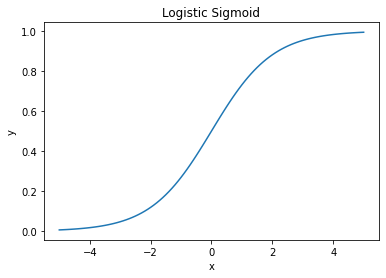

In [56]:
def sigmoid(z):
  return 1.0/(1 + math.e ** (-z))

x = [i * 0.1 for i in range(-50, 51)]
y = [sigmoid(z) for z in x]
plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Logistic Sigmoid')

Step 2: Prediction function

In [0]:
def predict(sample):
  result  = 0.0
  for i in range(len(sample)):
    result = result + weights[i] * sample[i]
    
  result = result + bias
  return sigmoid(result)

Step 3: Loss and cost functions

In [0]:
def loss(y_train, y_predicted):
  return -(y_train * math.log(y_predicted) + (1.0 - y_train) * math.log(1 - y_predicted))

Step 4: Backpropagation algorithm

In [0]:
num_features = wine.data.shape[1]

def train_one_epoch(x_train_samples, y_train_samples):
  cost = 0.0
  dw = [0.0] * num_features
  db = 0.0

  global bias, weights

  m = len(x_train_samples)
  for i in range(m):
    x_sample = x_train_samples[i]
    y_sample = y_train_samples[i]
    predicted = predict(x_sample)
    cost = cost + loss(y_sample, predicted)
    
    # dz is the derivative of the loss function
    dz = predicted - y_sample
    
    for j in range(len(weights)):
      dw[j] = dw[j] + x_sample[j] * dz
    db = db + dz
  
  cost = cost / m
  db = db / m
  bias = bias - learning_rate*db
  for j in range(len(weights)):
    dw[j] = dw[j] / m
    weights[j] = weights[j] - learning_rate*dw[j]
  
  return cost

Step 5: Training algorithm

In [0]:
help(StandardScaler)

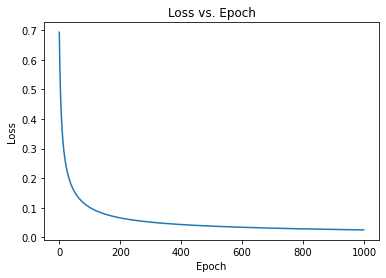

In [81]:
# Model will "learn" values for the weights and biases

weights = [0.0] * num_features
bias = 0.0

learning_rate = 0.1 # how quickly model converges on a solution: too small takes a long time to converge; too large the model can runpast and never get to the optimal value
# adjusting this is an empirical process

epochs = 1000 # number of times we iterate (overfiting can also happen)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_samples = scaler.fit_transform(wine.data)

y_train_samples = [1 if y == 2 else 0 for y in wine.target] # change y to 0, 1 or 2 to train to other class

loss_array = []
for epoch in range(epochs):
  loss_value = train_one_epoch(x_train_samples, y_train_samples)
  loss_array.append(loss_value)

plt.plot(range(epochs), loss_array)
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.title('Loss vs. Epoch')
plt.show()

Step 6: Predictions

Accuracy: 99.44 %


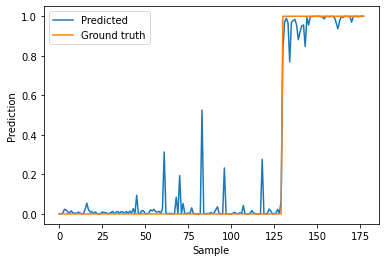

In [82]:
predictions = []

m = len(x_train_samples)
correct = 0
for i in range(m):
  sample = x_train_samples[i]
  value = predict(sample)
  predictions.append(value)
  if value >= 0.5:
    value = 1
  else:
    value = 0
  if value == y_train_samples[i]:
    correct = correct + 1.0

plt.plot(range(m), predictions, label='Predicted')
plt.plot(range(m), y_train_samples, label='Ground truth')
plt.ylabel('Prediction')
plt.xlabel('Sample')
plt.legend(loc='best')
plt.show()

print('Accuracy: %.2f %%' % (100 * correct/m))

Accuracy is the same for class 1 and class 2 - 99.44%. For class 0 is 100%.

# Questions about this assignment:

  1. regarding python
  * How to make subplots? In the initial step just to see how the data looks. Not sure how to put subplots like this:

  fig, axs = plt.subplots(6, 12)
  
  to make 12 subplots on one feature vs the remaining 12 features while at the same time I want to chnage the y label like it's working now (with multiple figures and not one figure with multiple subplots)

  * How can I add a legend in each plot saying which color corresponds to each class? couldnt figure it out

  with using the "wine.target_names" in the "plt.legend" or in the "label" inside the "plt.scatter" does not work

  2. regarding machine learning

  * this method is only possible to use to distinguish between 2 classes right? because when, say we want to train for class0, we put 1's for every data corresponding to class0 and 0's for everyhting else

  So maybe this is not adequate to use in a trinary problem?

  but our accuracys are good, but probably because we're predicting with the same data we trained?

  * How would I have a code to train and predict for all 3 classes? Do I need to define 3 functions for each? Can I do that in a loop instead? I dont like that I have to chnage the code all the time to y=0, 1 or 2 and not have the display of all the results at the same time.